In [2]:
# imports

import skimage
from skimage import io, exposure
from skimage.filters import threshold_local
import imshowpair

import numpy as np
import matplotlib.pyplot as plt

from skimage.util import img_as_ubyte
from skimage import data

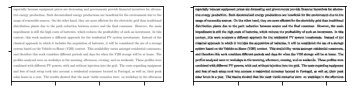

In [21]:
image = io.imread('images/example_0.jpg', np.float64)
# image = son1 = io.imread('http://homepages.inf.ed.ac.uk/rbf/HIPR2/images/son1.gif', np.float64)
# image = io.imread('http://fmwconcepts.com/imagemagick/otsuthresh/images/fingerprint.jpg')



image = img_as_ubyte(image)


threshold = 240
image_bin = image > threshold

# block_size = 11
# image_bin = threshold_local(image, block_size, offset=40)


# io.imshow(image_bin, cmap='gray')
# plt.show()

imshowpair.imshowpair(image, image_bin, cmap='gray')
plt.show()

In [20]:
# Algorithm

th = 0.2 # 0 to 1
min_sth = 5

px_rows = image_bin.shape[0]
px_cols = image_bin.shape[1]

text_lines = 0
sth = 0 # something

# for every pixel row
for row in range(0, px_rows):

    bpxs = 0 # black
    wpxs = 0 # white

    # for every pixel column
    for col in range(0, px_cols):
        if image_bin[row][col] == 0:
            # black
            bpxs = bpxs + 1
        else:
            # white
            wpxs = wpxs + 1

    # print(bpxs/px_cols)

    if bpxs/px_cols >= th:
        sth = sth + 1

    elif sth >= min_sth:
        # a text line was identified
        text_lines = text_lines + 1
        sth = 0

    # next pixel row or finished


print(text_lines)





13
